In [1]:
!pip install -r requirements.txt

  Using cached numpy-2.2.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.0-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached dvc_s3-3.2.0-py3-none-any.whl.metadata (1.4 kB)
  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
  Using cached mlflow-2.19.0-py3-none-any.whl.metadata (30 kB)
  Using cached dagshub-0.4.0-py3-none-any.whl.metadata (11 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from nltk.stem import PorterStemmer
import string as st
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhavy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhavy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhavy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
test_data = pd.read_csv("data/test_data.txt", sep = ':::', header = None)
train_data = pd.read_csv("data/train_data.txt", sep = ':::', header = None)
test_data_solution = pd.read_csv("data/test_data_solution.txt", sep = ':::', header = None)

train_data.columns = ["ID", "Title", "Genre", "Description"]
test_data.columns = ["ID", "Title", "Description"]
test_data_solution.columns = ["ID", "Title", "Genre", "Description"]

# Merge genre from test data solution with test data based on movie name
test_data = pd.merge(test_data, test_data_solution[["Title", "Genre"]], on = "Title", how = "left")

C:\Users\bhavy\AppData\Local\Temp\ipykernel_18408\2481135764.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("data/test_data.txt", sep = ':::', header = None)
C:\Users\bhavy\AppData\Local\Temp\ipykernel_18408\2481135764.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("data/train_data.txt", sep = ':::', header = None)
C:\Users\bhavy\AppData\Local\Temp\ipykernel_18408\2481135764.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpret

In [4]:
test_data.head()

,ID,Title,Description,Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",thriller
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",comedy
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,drama


In [5]:
train_data.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
print("Train Data Shape: ",train_data.shape)
print("Test Data Shape: ",test_data.shape)

Train Data Shape:  (54214, 4)
Test Data Shape:  (54200, 4)


In [7]:
print("Test Data Info: ")
print(test_data.info())
print("Train data info: ")
print(train_data.info())
# We don't have any statistical data in this situation, so not using describe()

Test Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
 3   Genre        54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None
Train data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None


In [8]:
print("Test Data Null Values: ")
print(test_data.isnull().sum())
print("Train Data Null Values: ")
print(train_data.isnull().sum())
# No null values in the data

Test Data Null Values: 
ID             0
Title          0
Description    0
Genre          0
dtype: int64
Train Data Null Values: 
ID             0
Title          0
Genre          0
Description    0
dtype: int64


In [9]:
# Type of Genres in Dataset
print("Type of Genres in Train Data: ")
genre_counts = train_data["Genre"].value_counts()
print(genre_counts)
# Most common genre includes drama and documentary and least common genre includes war, news and game-shows

Type of Genres in Train Data: 
Genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64


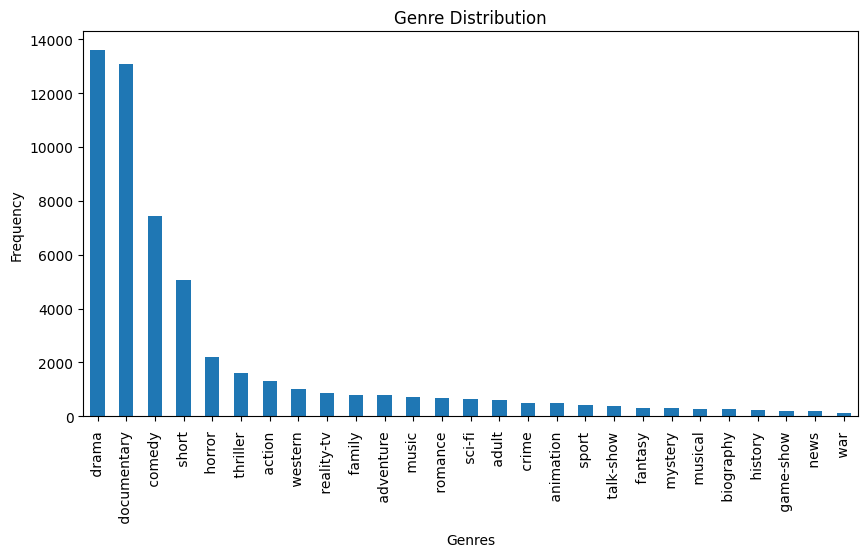

In [10]:
# Plot distribution
plt.figure(figsize=(10,5))
genre_counts.plot(kind='bar')
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.show()

- We can see the maximum hype is for drama, documentary, comedy and short
- Moderate hype for thriller, horror and action
- And others have an average hype with min for war

In [11]:
# count length of each description and add a column of that in train data
train_data["Description_Length"] = train_data["Description"].apply(lambda x: len(x.split()))
train_data.head()

,ID,Title,Genre,Description,Description_Length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,92
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,32
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,114
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,192
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,106


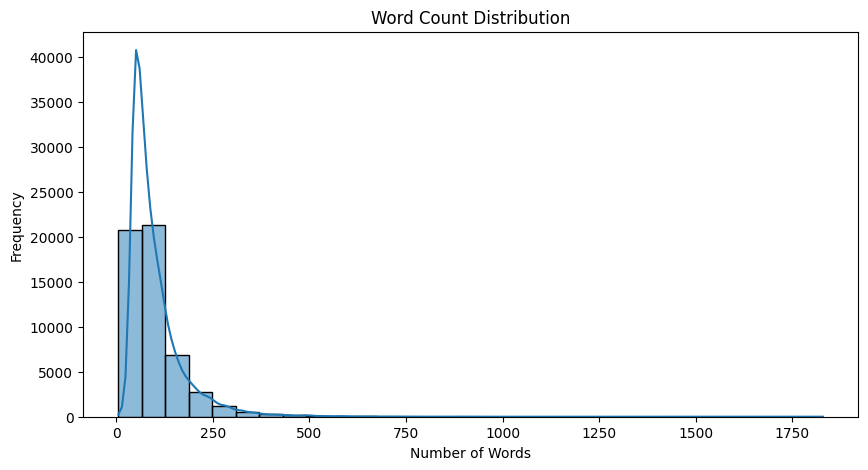

In [12]:
# Plot the word count distribution
plt.figure(figsize=(10,5))
sns.histplot(train_data["Description_Length"], bins = 30,kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

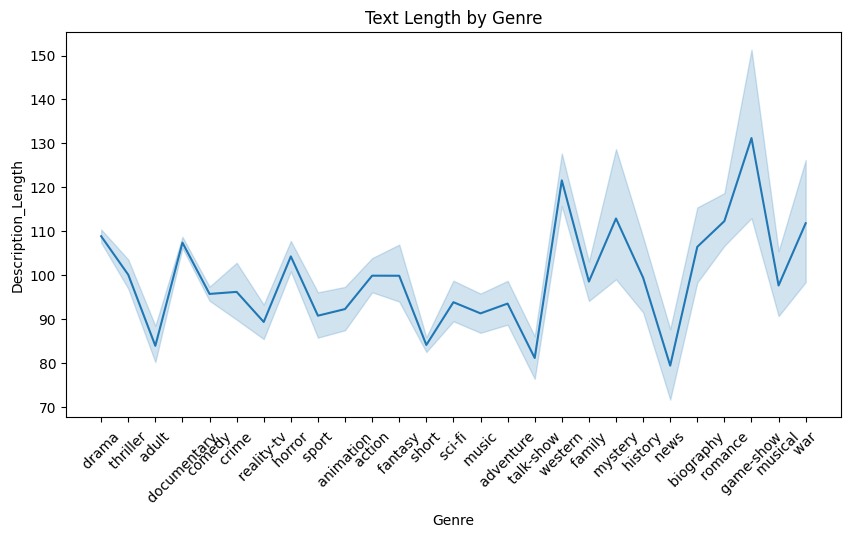

In [13]:
# Genre vs Description Length
plt.figure(figsize=(10,5))
sns.lineplot(x = train_data["Genre"], y = train_data["Description_Length"])
plt.title("Text Length by Genre")
plt.xticks(rotation=45)
plt.show()

In [14]:
# List all unique genres in the dataset
genres = train_data["Genre"].unique()
print("Unique Genres: ",genres)

Unique Genres:  [' drama ' ' thriller ' ' adult ' ' documentary ' ' comedy ' ' crime '
 ' reality-tv ' ' horror ' ' sport ' ' animation ' ' action ' ' fantasy '
 ' short ' ' sci-fi ' ' music ' ' adventure ' ' talk-show ' ' western '
 ' family ' ' mystery ' ' history ' ' news ' ' biography ' ' romance '
 ' game-show ' ' musical ' ' war ']


In [15]:
# Tokenize all plot summaries and count word frequencies
all_words = [word for text in train_data['Description'] for word in word_tokenize(text.lower())]
word_freq = Counter(all_words)

# Display most common words
print(word_freq.most_common(20))

[('the', 333793), (',', 310018), ('.', 248697), ('and', 190634), ('a', 175928), ('of', 167220), ('to', 158834), ('in', 108715), ('is', 83270), ('his', 67668), ("'s", 53266), ('with', 52633), ('her', 46967), ('he', 45242), ('for', 41771), ('that', 41142), ('on', 36877), ('as', 35275), ('their', 32370), ('by', 30801)]


In [16]:
train_data.drop(columns = ["Description_Length"], inplace = True)
def preprocess_text(text):
    text = text.lower() # Lowercase
    text = re.sub(r'[^a-z\s]', '', text) # Remove special characters and digits
    tokens = word_tokenize(text) # Tokenize
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatiser = WordNetLemmatizer()
    cleaned_text = " ".join(lemmatiser.lemmatize(token) for token in tokens)
    return cleaned_text

In [17]:
train_data['Description'] = train_data['Description'].apply(preprocess_text)
test_data['Description'] = test_data['Description'].apply(preprocess_text)

In [18]:
train_data.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,listening conversation doctor parent yearold o...
1,2,Cupid (1997),thriller,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,help unemployed father make end meet edith twi...
4,5,The Unrecovered (2007),drama,film title refers unrecovered body ground zero...


In [19]:
test_data.head()

,ID,Title,Description,Genre
0,1,Edgar's Lunch (1998),lr brane love life car apartment job especiall...,thriller
1,2,La guerra de papá (1977),spain march quico naughty child three belongin...,comedy
2,3,Off the Beaten Track (2010),one year life albin family shepherd north tran...,documentary
3,4,Meu Amigo Hindu (2015),father died hasnt spoken brother year serious ...,drama
4,5,Er nu zhai (1955),known internationally martial art superstar br...,drama


In [20]:
# Tokenize all plot summaries and count word frequencies
all_words = [word for text in train_data['Description'] for word in word_tokenize(text.lower())]
word_freq = Counter(all_words)

# Display most common words
print(word_freq.most_common(20))

[('life', 23908), ('one', 17442), ('film', 14643), ('story', 12677), ('year', 11967), ('world', 11632), ('new', 11528), ('find', 11311), ('family', 10805), ('get', 10121), ('young', 10100), ('love', 10043), ('time', 9843), ('take', 9530), ('two', 9488), ('friend', 9171), ('woman', 9101), ('man', 9094), ('people', 8185), ('day', 8117)]


In [21]:
from sklearn.preprocessing import MinMaxScaler
# count length of each description and add a column of that in train data
train_description_scaler=pd.DataFrame()
train_description_scaler["Description_Length"] = train_data["Description"].apply(lambda x: len(x.split()))
scaler = MinMaxScaler()
train_data["Description_Length"] = scaler.fit_transform(train_description_scaler["Description_Length"].values.reshape(-1, 1))


In [22]:
# Initialize TfidfVectorizer with reduced max_features
tfidf_vectorizer = TfidfVectorizer(max_features=70000)  # Reduce dimensionality
X_train = tfidf_vectorizer.fit_transform(train_data['Description'])  # Sparse matrix
X_test = tfidf_vectorizer.transform(test_data['Description']) # Transform the test data

In [23]:
X_train.shape, X_test.shape

((54214, 70000), (54200, 70000))

In [24]:
# Encoding the target labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['Genre'])
y_test = label_encoder.transform(test_data['Genre'])

In [25]:
y_train, y_test

(array([ 8, 24,  1, ...,  7,  5, 12], shape=(54214,)),
 array([24,  5,  7, ...,  1,  8,  8], shape=(54200,)))

In [26]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Naive Bayes Model

In [27]:
nb_model = MultinomialNB()
nb_model.fit(X_train_split, y_train_split)

MultinomialNB()

In [28]:
# Predict on the validation set
y_val_pred = nb_model.predict(X_val_split)

# Evaluate the model's performance
print("Naive Bayes Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_val_split, y_val_pred):.4f}\n")
print("Classification Report:\n", classification_report(y_val_split, y_val_pred, target_names=label_encoder.classes_))

Naive Bayes Model Evaluation:
Accuracy: 0.4477

Classification Report:
                precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.60      0.08      0.14      1443
       crime        0.00      0.00      0.00       107
 documentary        0.53      0.90      0.67      2659
       drama        0.38      0.87      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        1.00      0.00      0.01       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00   

c:\Users\bhavy\Desktop\Projects\codsoft-ml-internship-projects\1-movie-genre-classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bhavy\Desktop\Projects\codsoft-ml-internship-projects\1-movie-genre-classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bhavy\Desktop\Projects\codsoft-ml-internship-projects\1-movie-genre-classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being s

### Logistic Regression Model

In [29]:
lr_model = LogisticRegression()
lr_model.fit(X_train_split, y_train_split)

c:\Users\bhavy\Desktop\Projects\codsoft-ml-internship-projects\1-movie-genre-classification\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# Predict on the validation set
y_val_pred = lr_model.predict(X_val_split)

# Evaluate the model's performance
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_val_split, y_val_pred):.4f}\n")
print("Classification Report:\n", classification_report(y_val_split, y_val_pred, target_names=label_encoder.classes_))


Logistic Regression Model Evaluation:
Accuracy: 0.5798

Classification Report:
                precision    recall  f1-score   support

      action        0.55      0.21      0.31       263
       adult        0.78      0.19      0.30       112
   adventure        0.45      0.13      0.20       139
   animation        0.50      0.01      0.02       104
   biography        0.00      0.00      0.00        61
      comedy        0.52      0.60      0.56      1443
       crime        0.33      0.01      0.02       107
 documentary        0.66      0.86      0.75      2659
       drama        0.53      0.80      0.64      2697
      family        0.53      0.07      0.12       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.93      0.35      0.51        40
     history        0.00      0.00      0.00        45
      horror        0.68      0.55      0.61       431
       music        0.66      0.38      0.48       144
     musical        0.00      0.00     

c:\Users\bhavy\Desktop\Projects\codsoft-ml-internship-projects\1-movie-genre-classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bhavy\Desktop\Projects\codsoft-ml-internship-projects\1-movie-genre-classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bhavy\Desktop\Projects\codsoft-ml-internship-projects\1-movie-genre-classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being s

### Linear SVC Model

In [31]:
svc_model = LinearSVC()
svc_model.fit(X_train_split, y_train_split)

LinearSVC()

In [32]:
# Predict on the validation set
y_val_pred = svc_model.predict(X_val_split)

# Evaluate the model's performance
print("Linear SVC Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_val_split, y_val_pred):.4f}\n")
print("Classification Report:\n", classification_report(y_val_split, y_val_pred, target_names=label_encoder.classes_))

Linear SVC Model Evaluation:
Accuracy: 0.5786

Classification Report:
                precision    recall  f1-score   support

      action        0.47      0.35      0.40       263
       adult        0.76      0.46      0.58       112
   adventure        0.44      0.24      0.31       139
   animation        0.26      0.10      0.14       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.58      0.55      1443
       crime        0.30      0.07      0.12       107
 documentary        0.69      0.81      0.74      2659
       drama        0.56      0.72      0.63      2697
      family        0.34      0.15      0.21       150
     fantasy        0.36      0.07      0.11        74
   game-show        0.89      0.62      0.74        40
     history        0.50      0.02      0.04        45
      horror        0.64      0.64      0.64       431
       music        0.59      0.56      0.58       144
     musical        0.33      0.06      0.10    

### Random Forest Classifier

In [33]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=None,    # No depth limit
    random_state=42,   # For reproducibility
    n_jobs=-1          # Utilize all CPU cores for faster training
)
rf_model.fit(X_train_split, y_train_split)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [34]:
# Predict on the validation set
y_val_pred = rf_model.predict(X_val_split)
# Evaluate the model's performance
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_val_split, y_val_pred):.4f}\n")
print("Classification Report:\n", classification_report(y_val_split, y_val_pred, target_names=label_encoder.classes_))

Random Forest Model Evaluation:
Accuracy: 0.4878

Classification Report:
                precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        1.00      0.09      0.16       112
   adventure        0.67      0.06      0.11       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.27      0.35      1443
       crime        1.00      0.01      0.02       107
 documentary        0.55      0.89      0.68      2659
       drama        0.42      0.84      0.56      2697
      family        1.00      0.03      0.05       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.92      0.30      0.45        40
     history        0.00      0.00      0.00        45
      horror        0.81      0.11      0.19       431
       music        0.77      0.12      0.20       144
     musical        0.00      0.00      0.00 

c:\Users\bhavy\Desktop\Projects\codsoft-ml-internship-projects\1-movie-genre-classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bhavy\Desktop\Projects\codsoft-ml-internship-projects\1-movie-genre-classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bhavy\Desktop\Projects\codsoft-ml-internship-projects\1-movie-genre-classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being s

### Finetuning

In [35]:
# Fine-tuning Linear SVC
svc_params = {
    'C': [0.05, 0.1, 0.5, 1],  # Narrowed range
    'max_iter': [500, 1000],  # Increased iterations for robustness
}
svc_model = LinearSVC()
svc_grid = GridSearchCV(svc_model, svc_params, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
svc_grid.fit(X_train_split, y_train_split)

print("Best parameters for Linear SVC:", svc_grid.best_params_)
print("Best accuracy for Linear SVC:", svc_grid.best_score_)

# Fine-tuning Logistic Regression
lr_params = {
    'C': [1, 5, 10, 50],  # Adjusted range
    'max_iter': [100, 200, 500],  # Increased iterations
    'solver': ['lbfgs', 'saga'],  # Using solvers for larger datasets
}
lr_model = LogisticRegression()
lr_grid = GridSearchCV(lr_model, lr_params, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
lr_grid.fit(X_train_split, y_train_split)

print("Best parameters for Logistic Regression:", lr_grid.best_params_)
print("Best accuracy for Logistic Regression:", lr_grid.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for Linear SVC: {'C': 0.5, 'max_iter': 500}
Best accuracy for Linear SVC: 0.5792349726775957
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters for Logistic Regression: {'C': 5, 'max_iter': 100, 'solver': 'lbfgs'}
Best accuracy for Logistic Regression: 0.5826473911138779


c:\Users\bhavy\Desktop\Projects\codsoft-ml-internship-projects\1-movie-genre-classification\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Ensemble Model: Voting Classifier

In [36]:
from sklearn.ensemble import VotingClassifier

# Best models from fine-tuning
svc_best = LinearSVC(C=0.5, max_iter=500)
lr_best = LogisticRegression(C=5, max_iter=100, solver='lbfgs')

# Training the individual models on full training data
svc_best.fit(X_train_split, y_train_split)
lr_best.fit(X_train_split, y_train_split)

# Ensemble with Voting Classifier
ensemble_model = VotingClassifier(
    estimators=[('svc', svc_best), ('lr', lr_best)],
    voting='hard'  # Use 'soft' for probabilities
)
ensemble_model.fit(X_train_split, y_train_split)

# Evaluate on validation data
ensemble_predictions = ensemble_model.predict(X_val_split)
ensemble_accuracy = accuracy_score(y_val_split, ensemble_predictions)

print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")

c:\Users\bhavy\Desktop\Projects\codsoft-ml-internship-projects\1-movie-genre-classification\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Model Accuracy: 0.5898


c:\Users\bhavy\Desktop\Projects\codsoft-ml-internship-projects\1-movie-genre-classification\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# Update Logistic Regression with a higher max_iter and different solver
lr_model_updated = LogisticRegression(C=5, solver='sag', max_iter=100, n_jobs=-1)
lr_model_updated.fit(X_train_split, y_train_split)

# Re-training ensemble with the updated Logistic Regression model
ensemble_model_updated = VotingClassifier(
    estimators=[('svc', svc_best), ('lr', lr_model_updated)],
    voting='hard'
)
ensemble_model_updated.fit(X_train_split, y_train_split)

# Evaluating the updated ensemble model
ensemble_predictions_updated = ensemble_model_updated.predict(X_val_split)
ensemble_accuracy_updated = accuracy_score(y_val_split, ensemble_predictions_updated)

print(f"Updated Ensemble Model Accuracy: {ensemble_accuracy_updated:.4f}")


## to get rid of the annoying warnings :( hopefully it worked!

Updated Ensemble Model Accuracy: 0.5884


Best accuracy on validation set was achieved by Ensemble Model Accuracy: 0.5888 (Linear SVC + Logistic Regression)

## Make predictions on test data !

In [38]:
y_test_pred = ensemble_model_updated.predict(X_test)
y_test_pred_genre = label_encoder.inverse_transform(y_test_pred)
test_data['predicted_genre'] = y_test_pred_genre
test_data = test_data.drop('Genre', axis=1)

In [39]:
import pickle

# Save the trained model to a pickle file
with open('artifacts/ensemble_model_updated.pkl', 'wb') as f:
    pickle.dump(ensemble_model_updated, f)

# Save the label encoder to a pickle file
with open('artifacts/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Save the TF-IDF vectorizer to a pickle file
with open('artifacts/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

test_data.to_csv('artifacts/test_data_predictions.csv', index=False)